In [3]:
from pylab import *
import matplotlib
%matplotlib inline

path="/home/wcui/Work/Data/Box_1024_410_Trieste/"

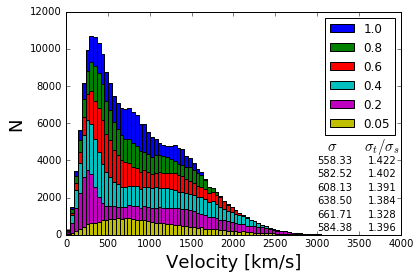

In [33]:
#dd=np.load(path+"RDM/vel-group/0_0.npy")
dd=np.load("0_0.npy")
G=4.301e-9     #in km2 Mpc MSun-1 s-2
ax=subplot(111)
rdf=[1.0,0.8,0.6,0.4,0.2,0.05]
tpy,tps=0.32,0.0
for i in rdf:
    ids=dd[:,1]<=i*dd[:,1].max()
    hist(dd[ids,2],bins=80,label=str(i))
    ttm=np.sum(dd[ids,0],dtype=np.float64)
    #vs=np.sum(dd[ids,0]*dd[ids,2]**2,dtype=np.float64)/ttm - (np.sum(dd[ids,0]*dd[ids,2],dtype=np.float64)/ttm)**2
    #vs=np.sum(dd[ids,2]**2,dtype=np.float64)/dd[ids,2].size - (np.sum(dd[ids,2],dtype=np.float64)/dd[ids,2].size)**2
    vs = np.std(dd[ids,2])**2
    text(0.75,tpy-tps,str(np.sqrt(vs))[:6],transform=ax.transAxes)
    ts=np.sqrt(G*ttm*1.0e10/2/(i*dd[:,1].max()/1000.))
    text(0.9,tpy-tps,str(ts/np.sqrt(vs))[:5],transform=ax.transAxes)
    tps+=0.06
legend(loc=1)
text(0.78,0.38,r'$\sigma$',transform=ax.transAxes,fontsize=15)
text(0.89,0.38,r'$\sigma_t/\sigma_s$',transform=ax.transAxes,fontsize=15)
xlabel("Velocity [km/s]",fontsize=18)
ylabel("N",fontsize=18)
#savefig("/home/wcui/Work/Project/DC-I/RDM/vd-0_0.png")

In [28]:
print(np.std(dd[:,2])); print(np.sqrt(G*np.sum(dd[:,0])*1.0e10/2/(dd[:,1].max()/1000.)))
dd[:,1].max()

516.026471781
787.043237507


1631.2210617720639

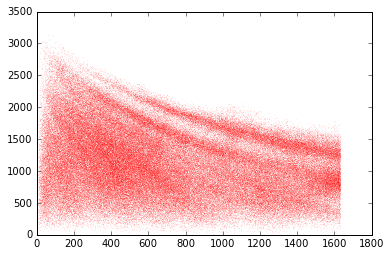

In [32]:
plot(dd[:,1],dd[:,2],'r.',ms=0.1)

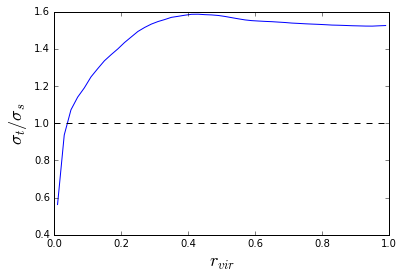

In [13]:
rdf=np.arange(0.01,1,0.02)
vdr=np.zeros(rdf.size)
vtr=np.zeros(rdf.size)
for ii,i in enumerate(rdf):
    ids=dd[:,1]<=i*dd[:,1].max()
    ttm=np.sum(dd[ids,0],dtype=np.float64)
    vdr[ii]=np.sum(dd[ids,0]*dd[ids,2]**2,dtype=np.float64)/ttm - (np.sum(dd[ids,0]*dd[ids,2],dtype=np.float64)/ttm)**2
    vtr[ii]=np.sqrt(G*ttm*1.0e10/2/(i*dd[:,1].max()/1000.))
plot(rdf,vtr/np.sqrt(vdr))
plot([0,1],[1,1],'k--')
xlabel(r"$r_{vir}$",fontsize=18)
ylabel(r'$\sigma_t/\sigma_s$',fontsize=18)
savefig("/home/wcui/Work/Project/DC-I/RDM/vd-rr-0_0.png")

In [14]:
selectg=np.loadtxt(path+"RDM/Virhalo_gt_145.txt")
sigr=np.zeros(selectg.shape[0])
for i in range(sigr.size):
    data=np.load(path+"RDM/vel-group/"+str(i)+"_"+str(np.int32(selectg[i,2]))+".npy")
    ttm=np.sum(data[:,0],dtype=np.float64)
    vdg=np.sum(data[:,0]*data[:,2]**2,dtype=np.float64)/ttm - (np.sum(data[:,0]*data[:,2],dtype=np.float64)/ttm)**2
    vtg=np.sqrt(G*ttm*1.0e10/2/(data[:,1].max()/1000.))
    sigr[i]=vtg/np.sqrt(vdg)

In [22]:
print(np.log10(selectg[0][4]*1.0e10))

14.6719705685


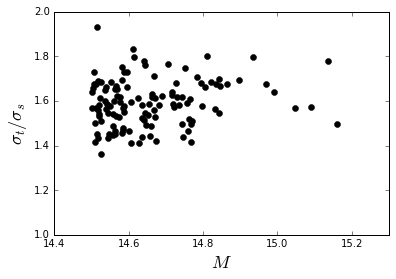

In [15]:
plot(np.log10(selectg[:,4]*1.0e10),sigr,'ko')
plot([0,1],[1,1],'k--')
xlim(14.4,15.3)
xlabel(r"$M$",fontsize=18)
ylabel(r'$\sigma_t/\sigma_s$',fontsize=18)
savefig("/home/wcui/Work/Project/DC-I/RDM/vd-m-0_0.png")

In [6]:
# dd=np.load("1_3259.npy")

# G=4.301e-9     #in km2 Mpc MSun-1 s-2
# ax=subplot(111)
# rdf=[1.0,0.8,0.6,0.4,0.2,0.05]
# tpy,tps=0.35,0.0
# for i in rdf:
#     ids=dd[:,1]<=i*dd[:,1].max()
#     hist(dd[ids,2],bins=80,label=str(i))
#     ttm=np.sum(dd[ids,0],dtype=np.float64)
#     vs=np.sum(dd[ids,0]*dd[ids,2]**2,dtype=np.float64)/ttm - (np.sum(dd[ids,0]*dd[ids,2],dtype=np.float64)/ttm)**2
#     text(0.75,tpy-tps,str(np.sqrt(vs))[:6],transform=ax.transAxes)
#     ts=np.sqrt(G*ttm*1.0e10/2/(i*dd[:,1].max()/1000.))
#     text(0.9,tpy-tps,str(ts/np.sqrt(vs))[:5],transform=ax.transAxes)
#     tps+=0.06
# legend(loc=1)
# xlabel("Velocity [km/s]",fontsize=18)
# ylabel("N",fontsize=18)
# savefig("/home/wcui/Work/Project/DC-I/RDM/vd-0_0.eps")